In [1]:
#importing all the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
import numpy as np
from scipy.stats import norm
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling
from IPython.display import display, HTML
from sklearn.model_selection import train_test_split# Import 'train_test_split'
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler


Using TensorFlow backend.


In [2]:
#importing the dataset
df=pd.read_csv("DC_Properties_trimmed.csv")
df.info() #checking the structure of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28900 entries, 0 to 28899
Data columns (total 46 columns):
BATHRM                28900 non-null int64
HF_BATHRM             28900 non-null int64
HEAT                  28900 non-null object
AC                    28900 non-null object
NUM_UNITS             28900 non-null int64
ROOMS                 28900 non-null int64
BEDRM                 28900 non-null int64
AYB                   28900 non-null int64
YR_RMDL               28900 non-null int64
EYB                   28900 non-null int64
STORIES               28900 non-null float64
SALEDATE              28900 non-null object
PRICE                 28900 non-null int64
QUALIFIED             28900 non-null object
SALE_NUM              28900 non-null int64
GBA                   28900 non-null int64
BLDG_NUM              28900 non-null int64
STYLE                 28900 non-null object
STRUCT                28900 non-null object
GRADE                 28900 non-null object
CNDTN                 

In [3]:
#performing exploratory Data analysis

#performing descriptive analysis
df.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,...,FIREPLACES,USECODE,LANDAREA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,SQUARE,X,Y
count,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,2.890000e+04,...,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000,28900.000000
mean,2.333806,0.662007,1.261246,7.502872,3.482318,1922.556574,2004.259273,1969.125433,2.165972,6.549323e+05,...,0.715848,13.724637,2852.047197,20009.906851,38.913195,-77.010707,5509.161730,2663.814844,-77.010712,38.913201
std,1.038695,0.588201,0.635730,2.319767,1.160678,22.339850,17.183443,10.547762,5.563060,6.048247e+05,...,0.982890,4.704569,2865.397209,7.541925,0.030292,0.041245,3297.000377,1704.447584,0.041238,0.030293
min,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1915.000000,0.000000,1.000000e+00,...,0.000000,11.000000,216.000000,20001.000000,38.819731,-77.113909,100.000000,65.000000,-77.113135,38.820576
25%,2.000000,0.000000,1.000000,6.000000,3.000000,1908.000000,2002.000000,1964.000000,2.000000,3.100000e+05,...,0.000000,11.000000,1419.000000,20002.000000,38.892645,-77.033455,2301.000000,1052.000000,-77.033397,38.892800
50%,2.000000,1.000000,1.000000,7.000000,3.000000,1923.000000,2008.000000,1967.000000,2.000000,5.475000e+05,...,0.000000,12.000000,1943.000000,20010.000000,38.911306,-77.005555,6700.000000,2621.000000,-77.005088,38.911421
75%,3.000000,1.000000,1.000000,8.000000,4.000000,1938.000000,2012.000000,1972.000000,2.000000,8.100000e+05,...,1.000000,13.000000,3366.000000,20016.000000,38.933681,-76.985763,8301.000000,4011.000000,-76.986004,38.933636
max,11.000000,11.000000,6.000000,31.000000,20.000000,2015.000000,2018.000000,2017.000000,826.000000,2.396029e+07,...,13.000000,39.000000,155905.000000,20036.000000,38.982532,-76.909758,11100.000000,6277.000000,-76.910511,38.982276


In [4]:
df['PRICE'].describe()

count    2.890000e+04
mean     6.549323e+05
std      6.048247e+05
min      1.000000e+00
25%      3.100000e+05
50%      5.475000e+05
75%      8.100000e+05
max      2.396029e+07
Name: PRICE, dtype: float64

In [5]:
#removing outliers
Q1 = df['PRICE'].quantile(0.25)
Q3 = df['PRICE'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (df['PRICE'] >= Q1 - 1.5 * IQR) & (df['PRICE'] <= Q3 + 1.5 *IQR)
df.loc[filter] 

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,Warm Cool,Y,2,8,4,1910,1988,1972,...,-77.040832,Old City 2,040 D Old City 2,4201,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,1,Hot Water Rad,Y,2,8,4,1906,2011,1972,...,-77.040129,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
4,3,1,Warm Cool,Y,2,7,3,1908,2008,1967,...,-77.039903,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
5,3,1,Warm Cool,Y,2,5,3,1917,2000,1967,...,-77.039716,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
6,3,1,Warm Cool,Y,1,8,3,1908,2006,1967,...,-77.039844,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
7,3,1,Hot Water Rad,Y,2,9,3,1908,2013,1969,...,-77.040138,Old City 2,040 D Old City 2,4201,004201 2005,Ward 2,152,-77.040429,38.914881,NW
8,3,1,Hot Water Rad,Y,1,14,5,1880,2009,1987,...,-77.033774,Old City 2,040 E Old City 2,5201,005201 4003,Ward 2,208,-77.033366,38.911716,NW
9,1,0,Forced Air,Y,1,6,3,1880,2010,1967,...,-77.033925,Old City 2,040 E Old City 2,5201,005201 4003,Ward 2,208,-77.033366,38.911716,NW
10,2,1,Forced Air,Y,1,5,3,1880,2010,1984,...,-77.033972,Old City 2,040 E Old City 2,5201,005201 4003,Ward 2,208,-77.033366,38.911716,NW
11,2,1,Hot Water Rad,Y,1,8,3,1880,2004,1967,...,-77.034070,Old City 2,040 E Old City 2,5201,005201 4003,Ward 2,208,-77.033366,38.911716,NW


In [6]:
#change strings to ints to preprocess for ML algo
df_cat=df.copy()
def strnums(cols):
  return dict(zip(set(df_cat[cols]),list(range(0,len(set(df_cat[cols]))))))
for columns in set(df_cat.select_dtypes(exclude='number')):
  df_cat[columns] = df_cat[columns].map(strnums(columns))
df_cat.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,4,0,0,0,2,8,4,1910,1988,1972,...,-77.040832,11,108,4201,2704,7,152,-77.040429,38.914881,0
1,3,1,7,0,2,9,5,1910,2009,1984,...,-77.040678,11,108,4201,2704,7,152,-77.040429,38.914881,0
2,3,1,7,0,2,8,5,1900,2003,1984,...,-77.040629,11,108,4201,2704,7,152,-77.040429,38.914881,0
3,3,1,7,0,2,8,4,1906,2011,1972,...,-77.040129,11,108,4201,1536,7,152,-77.040429,38.914881,0
4,3,1,0,0,2,7,3,1908,2008,1967,...,-77.039903,11,108,4201,1536,7,152,-77.040429,38.914881,0


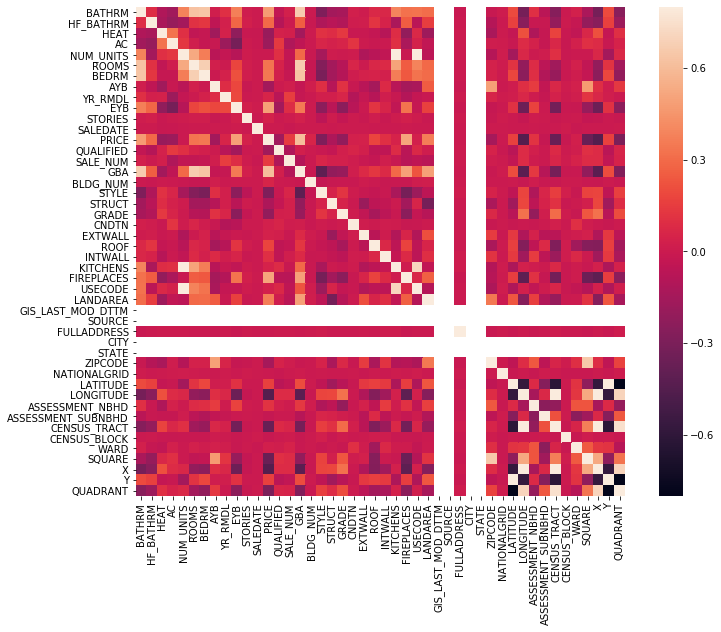

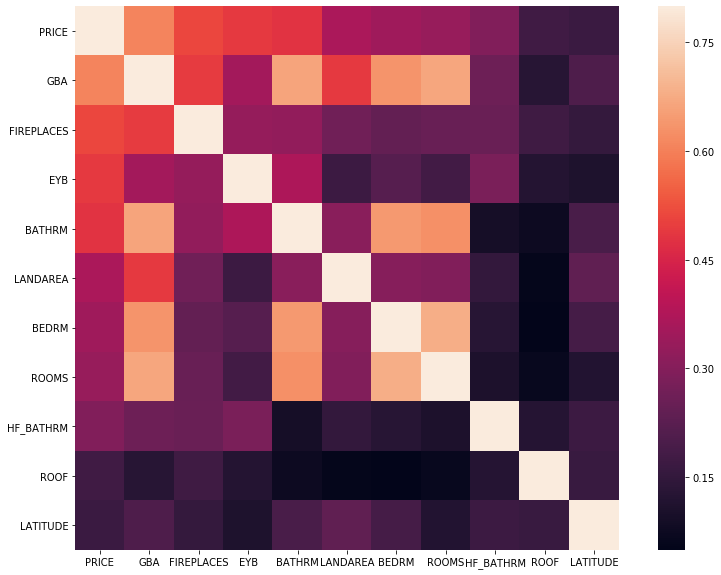

In [7]:
corrmat = df_cat.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

k = 11 #number of variables for heatmap
cols = corrmat.nlargest(k, 'PRICE')['PRICE'].index
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(df_cat[cols].corr(), vmax=.8, square=True);

In [8]:
#creating variables with the selected variables
df1= df[['PRICE', 'GBA', 'FIREPLACES','EYB','BATHRM','LANDAREA','BEDRM','ROOMS','GRADE','HF_BATHRM','QUADRANT']]
df1.head()

#performing one hot encoding on GRADE and STYLE

# generate binary values using get_dummies
df1 = pd.get_dummies(df1, columns=["GRADE"], prefix=["GRADE_"] )
df1 = pd.get_dummies(df1, columns=["QUADRANT"], prefix=["QUADRANT_"] )
df1.head()


#2. Normalization on Numerical variables
# find numeric columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# get column names
cols_numeric = df1.select_dtypes(include=numerics).columns.tolist()
# get column indices
cols_numeric_index=[df1.columns.get_loc(col) for col in cols_numeric]
print('Numerical column names:\n',cols_numeric)
print('Numerical column indeices:\n',cols_numeric_index)



# Normalization method using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_numeric]=scaler.fit_transform(df1[cols_numeric])

df1.head()

Numerical column names:
 ['PRICE', 'GBA', 'FIREPLACES', 'EYB', 'BATHRM', 'LANDAREA', 'BEDRM', 'ROOMS', 'HF_BATHRM']
Numerical column indeices:
 [0, 1, 2, 3, 4, 5, 6, 7, 8]


,PRICE,GBA,FIREPLACES,EYB,BATHRM,LANDAREA,BEDRM,ROOMS,HF_BATHRM,GRADE__Above Average,...,GRADE__Exceptional-D,GRADE__Fair Quality,GRADE__Good Quality,GRADE__No Data,GRADE__Superior,GRADE__Very Good,QUADRANT__NE,QUADRANT__NW,QUADRANT__SE,QUADRANT__SW
0,0.045701,0.145271,0.384615,0.558824,0.363636,0.009403,0.20,0.258065,0.000000,0,...,0,0,0,0,0,1,0,1,0,0
1,0.087645,0.145271,0.307692,0.676471,0.272727,0.009403,0.25,0.290323,0.090909,0,...,0,0,0,0,0,1,0,1,0,0
2,0.066861,0.142661,0.230769,0.676471,0.272727,0.009403,0.25,0.258065,0.090909,0,...,0,0,0,0,0,1,0,1,0,0
3,0.043822,0.136960,0.076923,0.558824,0.272727,0.009063,0.20,0.258065,0.090909,0,...,0,0,0,0,0,1,0,1,0,0
4,0.059682,0.074250,0.076923,0.509804,0.272727,0.007759,0.15,0.225806,0.090909,1,...,0,0,0,0,0,0,0,1,0,0


In [9]:
#Baseline model
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X = df1.drop(columns='PRICE')
y = df1['PRICE']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=100)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(20230, 24) (20230,)
(8670, 24) (8670,)


In [10]:
dummy_median = DummyRegressor(strategy='mean')
dummy_regressor = dummy_median.fit(X_train,y_train)
dummy_predicts = dummy_regressor.predict(X_test)
print("Model Accuracy:", dummy_regressor.score(X_test,y_test)*100)


print('The average error margin for each prediction is $',mean_absolute_error(y_test,dummy_predicts))


Model Accuracy: -0.09893711916764136
The average error margin for each prediction is $ 0.015204534819671867


In [11]:
#performing linear regression
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
y_pred = regressor.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(y_pred - y_test)))

print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))


print(r2_score(y_pred , y_test)) 



Mean absolute error: 2362753.26
Residual sum of squares (MSE): 48401167222388968.00
-0.00011535354023894939


In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

models = [RandomForestRegressor(n_estimators=200,criterion='mse',max_depth=20,random_state=100),DecisionTreeRegressor(criterion='mse',max_depth=11,random_state=100),GradientBoostingRegressor(n_estimators=200,max_depth=12)]
learning_mods = pd.DataFrame()
temp = {}

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=100, verbose=0,
                      warm_start=False)
score on training 0.9351381507232367
r2 score 0.6262841253634253
DecisionTreeRegressor(criterion='mse', max_depth=11, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=100, splitter='best')
score on training 0.8127259346380546
r2 score 0.5654071295350498
GradientBoostingRegressor(alpha=0.9, criterion='friedma

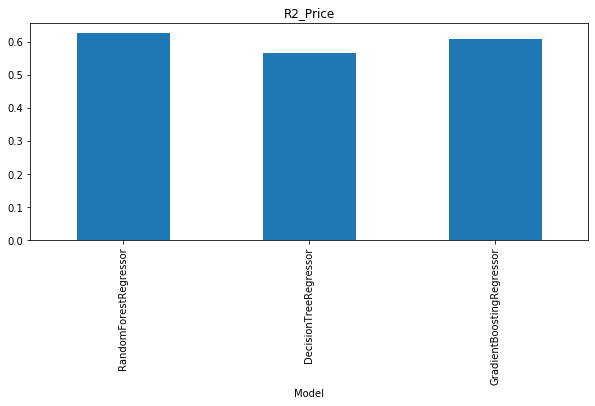

In [17]:
#run through models
for model in models:
    print(model)
    m = str(model)
    temp['Model'] = m[:m.index('(')]
    model.fit(X_train, y_train)
    temp['R2_Price'] = r2_score(y_test, model.predict(X_test))
    print('score on training',model.score(X_train, y_train))
    print('r2 score',r2_score(y_test, model.predict(X_test)))
    learning_mods = learning_mods.append([temp])
learning_mods.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
learning_mods.R2_Price.plot(ax=axes, kind='bar', title='R2_Price')
plt.show()

In [18]:
learning_mods.head()

,R2_Price
Model,
RandomForestRegressor,0.626284
DecisionTreeRegressor,0.565407
GradientBoostingRegressor,0.610216


In [19]:
#performing neural network
df2= df[['PRICE', 'GBA', 'FIREPLACES','EYB','BATHRM','LANDAREA','BEDRM','ROOMS','GRADE','HF_BATHRM','QUADRANT']]
df2.head()

#converting categorcal variables on GRADE and STYLE

# generate binary values using get_dummies
df2 = pd.get_dummies(df2, columns=["GRADE"], prefix=["GRADE_"] )
df2 = pd.get_dummies(df2, columns=["QUADRANT"], prefix=["QUADRANT_"] )
df2.head()



,PRICE,GBA,FIREPLACES,EYB,BATHRM,LANDAREA,BEDRM,ROOMS,HF_BATHRM,GRADE__Above Average,...,GRADE__Exceptional-D,GRADE__Fair Quality,GRADE__Good Quality,GRADE__No Data,GRADE__Superior,GRADE__Very Good,QUADRANT__NE,QUADRANT__NW,QUADRANT__SE,QUADRANT__SW
0,1095000,2522,5,1972,4,1680,4,8,0,0,...,0,0,0,0,0,1,0,1,0,0
1,2100000,2522,4,1984,3,1680,5,9,1,0,...,0,0,0,0,0,1,0,1,0,0
2,1602000,2484,3,1984,3,1680,5,8,1,0,...,0,0,0,0,0,1,0,1,0,0
3,1050000,2401,1,1972,3,1627,4,8,1,0,...,0,0,0,0,0,1,0,1,0,0
4,1430000,1488,1,1967,3,1424,3,7,1,1,...,0,0,0,0,0,0,0,1,0,0


In [20]:
#Splitting the train and test data
X_nn=df2.drop(columns=['PRICE'])
Y_nn=df2[['PRICE']]

In [21]:
model= keras.Sequential()

model.add(keras.layers.Dense(24,activation='relu',input_shape=(24,)))
model.add(keras.layers.Dense(24,activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error')



In [22]:
model.fit(X_nn,Y_nn,epochs=30,callbacks=[keras.callbacks.EarlyStopping(patience=5)])


Train on 28900 samples
Epoch 1/30
28900/28900 [==============================] - 1s 39us/sample - loss: 482563821454.0490
Epoch 2/30
28900/28900 [==============================] - 1s 31us/sample - loss: 262557059076.2519
Epoch 3/30
28900/28900 [==============================] - 1s 31us/sample - loss: 254133187020.9063
Epoch 4/30
28900/28900 [==============================] - 1s 35us/sample - loss: 247623171488.2613
Epoch 5/30
28900/28900 [==============================] - 1s 40us/sample - loss: 241798363119.2758
Epoch 6/30
28900/28900 [==============================] - 1s 40us/sample - loss: 237100441222.4310
Epoch 7/30
28900/28900 [==============================] - 1s 30us/sample - loss: 233601124377.2280
Epoch 8/30
28900/28900 [==============================] - 1s 31us/sample - loss: 231514882771.3905
Epoch 9/30
28900/28900 [==============================] - 1s 31us/sample - loss: 229982865046.0213
Epoch 10/30
28900/28900 [==============================] - 1s 39us/sample - loss: 2288

In [23]:
df2.iloc[0]

PRICE                   1095000
GBA                        2522
FIREPLACES                    5
EYB                        1972
BATHRM                        4
LANDAREA                   1680
BEDRM                         4
ROOMS                         8
HF_BATHRM                     0
GRADE__Above Average          0
GRADE__Average                0
GRADE__Excellent              0
GRADE__Exceptional-A          0
GRADE__Exceptional-B          0
GRADE__Exceptional-C          0
GRADE__Exceptional-D          0
GRADE__Fair Quality           0
GRADE__Good Quality           0
GRADE__No Data                0
GRADE__Superior               0
GRADE__Very Good              1
QUADRANT__NE                  0
QUADRANT__NW                  1
QUADRANT__SE                  0
QUADRANT__SW                  0
Name: 0, dtype: int64

In [24]:
test_data=np.array([2522,5,1972,4,1680,1680,8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0])
print("Predicted Price of the first row attributes",model.predict(test_data.reshape(1,24),batch_size=1))
print("Price of the original first row",df2['PRICE'].iloc[0])

Predicted Price of the first row attributes [[979395.4]]
Price of the original first row 1095000
